This notebook aims to relate COVID cases to pre-existing chronic diseases in the USA by looking at geographical correlations

Currently, just diabetes -- plan to add more

Note: need to control for other factors, like population density, social/economic demographics, etc.

# Datasets Used
Covid county dataset from: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/ (accessed 11/16/20)

2017 Diabetes county dataset from: https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Datasets

In [67]:
USAFACTS_DIR = 'USAFacts_Covid_by_county/'
COUNTY_CASES_FILENAME = USAFACTS_DIR + 'covid_confirmed_usafacts.csv'
COUNTY_DEATHS_FILENAME = USAFACTS_DIR + 'covid_deaths_usafacts.csv'
COUNTY_POP_FILENAME = USAFACTS_DIR + 'covid_county_population_usafacts.csv'

DIABETES_DIR = 'Diabetes_by_county/'
DIABETES_FILENAME = DIABETES_DIR + 'DiabetesAtlasCountyData.csv'

county_cases = pd.read_csv(COUNTY_CASES_FILENAME) #covid cases by county
county_deaths = pd.read_csv(COUNTY_DEATHS_FILENAME) #covid deaths by county
county_pop = pd.read_csv(COUNTY_POP_FILENAME) #population of counties
county_diabetes = pd.read_csv(DIABETES_FILENAME, skiprows = 2, skipfooter = 1)

<ipython-input-67-8700583f7909>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  county_diabetes = pd.read_csv(DIABETES_FILENAME, skiprows = 2, skipfooter = 1)


In [68]:
#county_cases is a pandas.DataFrame that holds cumulative covid cases per county on daily basis, since 1/22/20

county_cases

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,2242,2267,2283,2304,2328,2351,2385,2417,2435,2456
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,7134,7188,7226,7263,7348,7409,7454,7523,7596,7646
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1090,1092,1095,1098,1107,1112,1113,1117,1123,1128
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,917,924,926,932,948,961,966,973,978,986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,681,692,726,776,869,869,944,991,1075,1075
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,922,932,977,1007,1025,1025,1066,1108,1178,1178
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,542,544,551,568,627,627,664,686,729,729
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,185,185,187,190,199,199,203,206,218,218


In [69]:
#county_deaths is pandas.DataFrame that follows same format as county_cases

county_deaths

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,30,30,30,30,30,32,32,36,36,36
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,83,83,83,83,84,84,84,84,84,84
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,15,16,16,16,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


In [70]:
county_pop

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
...,...,...,...,...
3190,56037,Sweetwater County,WY,42343
3191,56039,Teton County,WY,23464
3192,56041,Uinta County,WY,20226
3193,56043,Washakie County,WY,7805


In [71]:
#the 2017 diabetes rate by county -- percentage is between 0 and 100

county_diabetes

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Bedford City,Virginia,51515,No Data,No Data,No Data
1,Shannon County,South Dakota,46113,No Data,No Data,No Data
2,Wrangell-Petersburg Census Area,Alaska,2280,No Data,No Data,No Data
3,Wade Hampton Census Area,Alaska,2270,No Data,No Data,No Data
4,Skagway-Hoonah-Angoon,Alaska,2232,No Data,No Data,No Data
...,...,...,...,...,...,...
3221,Jones County,North Carolina,37103,24.7,12.8,41.6
3222,Woodruff County,Arkansas,5147,25.3,11.4,46.8
3223,Bullock County,Alabama,1011,27.9,14.9,43.7
3224,Nowata County,Oklahoma,40105,27.9,14,44.3


## Quick EDA on COVID county dataset

In [72]:
#check datatypes of covid_cases
#note: may want to downsize these dtypes to be smaller, use less bits (int32?)

county_cases.dtypes

countyFIPS      int64
County Name    object
State          object
stateFIPS       int64
1/22/20         int64
                ...  
11/11/20        int64
11/12/20        int64
11/13/20        int64
11/14/20        int64
11/15/20        int64
Length: 303, dtype: object

In [73]:
#countyFIPS is the Federal Information Processing Standard code -- unique for each county
#stateFIPS is similar
#State is two-letter state code (ie CA, WY)
#County Name is the name of the county, obviously
#every other column has number of cumulative cases in that county on that date

county_cases.columns

Index(['countyFIPS', 'County Name', 'State', 'stateFIPS', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/6/20', '11/7/20', '11/8/20', '11/9/20', '11/10/20', '11/11/20',
       '11/12/20', '11/13/20', '11/14/20', '11/15/20'],
      dtype='object', length=303)

In [74]:
#total number of counties represented in this dataset
county_cases['countyFIPS'].nunique()

3146

In [75]:
#get number of counties per state
county_cases.groupby('State')['countyFIPS'].count()

State
AK     31
AL     68
AR     76
AZ     16
CA     60
CO     65
CT      9
DC      1
DE      4
FL     68
GA    160
HI      6
IA    100
ID     45
IL    103
IN     93
KS    106
KY    121
LA     65
MA     15
MD     25
ME     17
MI     84
MN     88
MO    116
MS     83
MT     57
NC    101
ND     54
NE     94
NH     11
NJ     22
NM     34
NV     18
NY     64
OH     89
OK     78
OR     37
PA     68
RI      6
SC     47
SD     67
TN     96
TX    255
UT     30
VA    134
VT     15
WA     40
WI     73
WV     56
WY     24
Name: countyFIPS, dtype: int64

In [76]:
#get number of cases per state on each date
county_cases.drop(['countyFIPS','County Name','stateFIPS'], axis = 1).groupby('State').sum()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
State,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,17597,18198,18716,19187,19712,20207,20688,21275,22014,22662
AL,0,0,0,0,0,0,0,0,0,0,...,200713,202482,203687,204856,206567,208636,210637,213617,215843,217822
AR,0,0,0,0,0,0,0,0,0,0,...,119230,120828,121866,122811,124235,126197,128006,130317,132163,133040
AZ,0,0,0,0,1,1,1,1,1,1,...,254764,257384,259264,259699,263133,265163,266562,269577,273053,275436
CA,0,0,0,0,2,3,3,4,4,4,...,963768,969090,973743,981493,990096,995487,1005994,1015809,1023575,1030112
CO,0,0,0,0,0,0,0,0,0,0,...,124466,127967,130984,134536,138426,142399,147597,154037,159233,163417
CT,0,0,0,0,0,0,0,0,0,0,...,78125,78125,78125,81463,82987,84741,85899,88645,88645,88645
DC,0,0,0,0,0,0,0,0,0,0,...,17792,17891,18001,18087,18173,18379,18507,18666,18814,18977
DE,0,0,0,0,0,0,0,0,0,0,...,26035,26283,26596,26908,27112,27353,27546,28016,28396,28803


In [77]:
#check for missing values
county_cases.isna().sum().sum() #no missing values in any columns, yay!

0

In [78]:
#looks like there's plenty of cases statewide that aren't allocated to any county
#figure out what to do with these -- add up county populations?

county_cases[county_cases['countyFIPS'] == 0]

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,Statewide Unallocated,AK,2,0,0,0,0,0,0,...,7,8,9,8,8,8,8,8,10,12
99,0,Statewide Unallocated,AZ,4,0,0,0,0,0,0,...,1,0,0,18,0,0,0,0,0,0
115,0,Statewide Unallocated,AR,5,0,0,0,0,0,0,...,1711,1755,1868,1932,1847,1948,2013,2138,2106,2166
191,0,Statewide Unallocated,CA,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,0,Statewide Unallocated,CO,8,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
316,0,Statewide Unallocated,CT,9,0,0,0,0,0,0,...,207,207,207,308,291,318,319,379,379,379
325,0,Statewide Unallocated,DE,10,0,0,0,0,0,0,...,92,92,93,93,93,93,93,93,93,93
330,0,Statewide Unallocated,FL,12,0,0,0,0,0,0,...,1784,1789,2038,2021,2027,2062,2057,2056,2076,2096
398,0,Statewide Unallocated,GA,13,0,0,0,0,0,0,...,17007,17135,17182,17215,17199,17195,17182,17352,17418,17608


## Join covid dataset with chronic disease datasets

Note: work on reducing memory size of dataframes by downsizing big dtypes into smaller dtypes -- may be issue in future

Note: clean up code

Note: try looking at map/GIS libraries, see about overlaying the data onto map of USA

### Covid cases

In [79]:
#convert flat number of county cases to rate over county population

#first merge population with cases data using countyFIPS
county_cases_rate = pd.merge(county_pop.drop(['County Name', 'State'], axis=1), county_cases, on = 'countyFIPS')

#then convert number of cases to rate over county population
county_cases_rate.iloc[:, 5:] = county_cases_rate.iloc[:, 5:].apply(lambda col: col / county_cases_rate['population'], axis = 0)
county_cases_rate

,countyFIPS,population,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,0,Statewide Unallocated,AL,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,Statewide Unallocated,AK,2,NaN,NaN,NaN,NaN,NaN,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,0,0,Statewide Unallocated,AZ,4,NaN,NaN,NaN,NaN,NaN,...,inf,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,Statewide Unallocated,AR,5,NaN,NaN,NaN,NaN,NaN,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,0,0,Statewide Unallocated,CA,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,56037,42343,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.016083,0.016343,0.017146,0.018327,0.020523,0.020523,0.022294,0.023404,0.025388,0.025388
5690,56039,23464,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.039294,0.039720,0.041638,0.042917,0.043684,0.043684,0.045431,0.047221,0.050205,0.050205
5691,56041,20226,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.026797,0.026896,0.027242,0.028083,0.031000,0.031000,0.032829,0.033917,0.036043,0.036043
5692,56043,7805,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.023703,0.023703,0.023959,0.024343,0.025496,0.025496,0.026009,0.026393,0.027931,0.027931


In [80]:
#preprocess chronic disease datasets

#diabetes dataset
temp = county_diabetes.drop(['County','State'], axis = 1) #redundant info, only need CountyFIPS for identification
cols = list(temp.columns)
cols[0] = 'countyFIPS' #rename to match column name in covid dataset
cols[1:] = ['Diabetes_' + c for c in cols[1:]]
temp.columns = cols #rename columns so that it's clear that they came from diabetes dataset
temp.iloc[:,1:] = temp.iloc[:,1:].apply(lambda col: pd.to_numeric(col, errors='coerce', downcast = 'float'), axis = 1) #convert to numeric datatype
county_diabetes = temp

In [81]:
main_cases_df = county_cases_rate.merge(county_diabetes,how='left', on = 'countyFIPS').dropna()
main_cases_df

,countyFIPS,population,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit
2550,1001,55869,Autauga County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.041239,0.041669,0.042081,0.042689,0.043262,0.043584,0.043960,11.4,8.3,15.200000
2551,1003,223234,Baldwin County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.032535,0.032916,0.033189,0.033391,0.033700,0.034027,0.034251,8.2,6.9,9.700000
2552,1005,24686,Barbour County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.044479,0.044843,0.045046,0.045086,0.045248,0.045491,0.045694,15.1,9.9,22.700001
2553,1007,22394,Bibb County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.041618,0.042333,0.042913,0.043137,0.043449,0.043672,0.044030,12.2,7.8,18.500000
2554,1009,57826,Blount County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.040380,0.041123,0.041504,0.042005,0.043026,0.043544,0.044081,12.2,8.9,16.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,56037,42343,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.018327,0.020523,0.020523,0.022294,0.023404,0.025388,0.025388,8.0,6.6,9.900000
5690,56039,23464,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.042917,0.043684,0.043684,0.045431,0.047221,0.050205,0.050205,2.2,1.3,3.200000
5691,56041,20226,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.028083,0.031000,0.031000,0.032829,0.033917,0.036043,0.036043,9.5,7.1,12.300000
5692,56043,7805,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.024343,0.025496,0.025496,0.026009,0.026393,0.027931,0.027931,8.2,5.5,12.200000


In [82]:
#check for correlation between diabetes percentage and covid cases

correlation_cases = main_cases_df.drop(['countyFIPS', 'stateFIPS'], axis = 1).corr().iloc[:, -3:]
correlation_cases

,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit
population,-0.091600,0.093800,-0.210898
1/22/20,-0.014613,0.001933,-0.022569
1/23/20,-0.014613,0.001933,-0.022569
1/24/20,-0.016609,0.005532,-0.027997
1/25/20,-0.016609,0.005532,-0.027997
...,...,...,...
11/14/20,0.118737,0.085985,0.106870
11/15/20,0.113413,0.082076,0.101669
Diabetes_Percentage,1.000000,0.826828,0.857917
Diabetes_Lower Limit,0.826828,1.000000,0.436664


c:\users\david\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Correlation between Diabetes and Covid Cases')

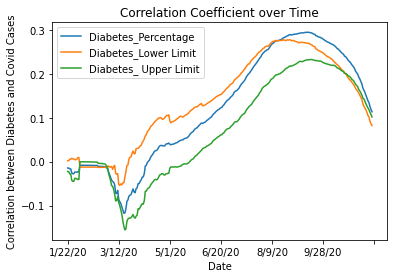

In [83]:
#graph the correlation coefficient over time between diabetes rate and covid cases

correlation_cases.iloc[1:-3,:].plot(kind='line')
plt.title('Correlation Coefficient over Time')
plt.xlabel('Date')
plt.ylabel('Correlation between Diabetes and Covid Cases')

hmm -- based on correlation table, it seems that there's either no correlation or very weak between COVID cases and diabetes; but what about COVID deaths and diabetes?

Also, check out urban/rural disparity -- may shed some light on if there's interaction effects with diabetes

Now that it's by covid rate vs diabetes rate, there is actually a positive correlation (albeit weak)

Possible confounding variable: maybe counties with high diabetes rate are less prone to healthy behavior? didn't follow covid safety guidelines?

### Covid deaths

In [84]:
#now look at county deaths vs diabetes

county_deaths_rate = pd.merge(county_pop.drop(['County Name', 'State'], axis=1), county_deaths, on = 'countyFIPS')

#then convert number of cases to rate over county population
county_deaths_rate.iloc[:, 5:] = county_deaths_rate.iloc[:, 5:].apply(lambda col: col / county_deaths_rate['population'], axis = 0)
county_deaths_rate

,countyFIPS,population,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,0,0,Statewide Unallocated,AL,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,Statewide Unallocated,AK,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,Statewide Unallocated,AZ,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,inf,inf,NaN,NaN,NaN,NaN
3,0,0,Statewide Unallocated,AR,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,Statewide Unallocated,CA,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,56037,42343,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094
5690,56039,23464,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
5691,56041,20226,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148
5692,56043,7805,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897


In [85]:
main_deaths_df = county_deaths_rate.merge(county_diabetes,how='left', on = 'countyFIPS').dropna()
main_deaths_df

,countyFIPS,population,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit
2550,1001,55869,Autauga County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.000537,0.000537,0.000573,0.000573,0.000644,0.000644,0.000644,11.4,8.3,15.200000
2551,1003,223234,Baldwin County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.000372,0.000376,0.000376,0.000376,0.000376,0.000376,0.000376,8.2,6.9,9.700000
2552,1005,24686,Barbour County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.000365,0.000365,0.000365,0.000365,0.000365,0.000365,0.000365,15.1,9.9,22.700001
2553,1007,22394,Bibb County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.000714,0.000759,0.000759,0.000759,0.000759,0.000759,0.000759,12.2,7.8,18.500000
2554,1009,57826,Blount County,AL,1,0.0,0.0,0.0,0.0,0.0,...,0.000450,0.000450,0.000588,0.000588,0.000588,0.000588,0.000588,12.2,8.9,16.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,56037,42343,Sweetwater County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,0.000094,8.0,6.6,9.900000
5690,56039,23464,Teton County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,2.2,1.3,3.200000
5691,56041,20226,Uinta County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,0.000148,9.5,7.1,12.300000
5692,56043,7805,Washakie County,WY,56,0.0,0.0,0.0,0.0,0.0,...,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,0.000897,8.2,5.5,12.200000


In [86]:
correlation_deaths = main_deaths_df.drop(['countyFIPS','stateFIPS'],axis=1).corr().iloc[:, -3:]
correlation_deaths

,Diabetes_Percentage,Diabetes_Lower Limit,Diabetes_ Upper Limit
population,-0.091600,0.093800,-0.210898
1/22/20,NaN,NaN,NaN
1/23/20,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN
...,...,...,...
11/14/20,0.238358,0.162068,0.242396
11/15/20,0.236617,0.159830,0.241606
Diabetes_Percentage,1.000000,0.826828,0.857917
Diabetes_Lower Limit,0.826828,1.000000,0.436664


c:\users\david\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Correlation between Diabetes and Covid Deaths')

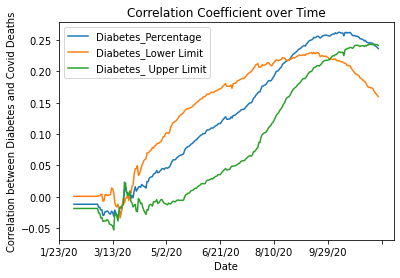

In [87]:
#graph the correlation coefficient over time between diabetes rate and covid deaths

correlation.iloc[1:-3,:].plot(kind='line')
plt.title('Correlation Coefficient over Time')
plt.xlabel('Date')
plt.ylabel('Correlation between Diabetes and Covid Deaths')

Whoa! really obvious positive correlation between diabetes rate and covid deaths!

Still should look out for confounding variables

## Modeling

Try to see if model can predict covid cases from diabetes rate -- if so, then data may have substance